# Convolutional Neural Networks - Mạng neuron tích chập

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Tải bộ dữ liệu MNIST

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Dữ liệu sẽ được tải về và lưu ở C:\Users\thien\.keras\datasets\mnist.npz

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

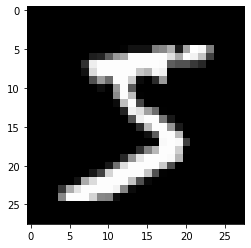

In [7]:
plt.imshow(X_train[0], cmap='gray')

In [8]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
# Số -1 là để cho python tự tính số còn lại cho phù hợp

In [9]:
X_train.shape

(60000, 784)

In [10]:
# Ép kiểu
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Rescale 
X_train /= 255.0
X_test /= 255.0

In [11]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [14]:
y_train[0]

5

In [15]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_train_cat.shape

(60000, 10)

In [17]:
y_test_cat.shape

(10000, 10)

### Sử dụng mạng DNN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K

In [19]:
# Reset 
K.clear_session() 
# Tạo model
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 570,602
Trainable params: 570,602
Non-trainable params: 0
_________________________________________________________________


### Training

In [20]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 7s 19ms/step - loss: 0.3346 - accuracy: 0.8930 - val_loss: 0.4116 - val_accuracy: 0.8853
Epoch 2/10
329/329 [==============================] - 6s 17ms/step - loss: 0.1114 - accuracy: 0.9666 - val_loss: 0.1123 - val_accuracy: 0.9666
Epoch 3/10
329/329 [==============================] - 5s 17ms/step - loss: 0.0740 - accuracy: 0.9770 - val_loss: 0.1472 - val_accuracy: 0.9601
Epoch 4/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0524 - accuracy: 0.9838 - val_loss: 0.1016 - val_accuracy: 0.9724
Epoch 5/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0393 - accuracy: 0.9879 - val_loss: 0.1502 - val_accuracy: 0.9655
Epoch 6/10
329/329 [==============================] - 5s 17ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.1623 - val_accuracy: 0.9672
Epoch 7/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.1404 - val_accuracy: 0.9724

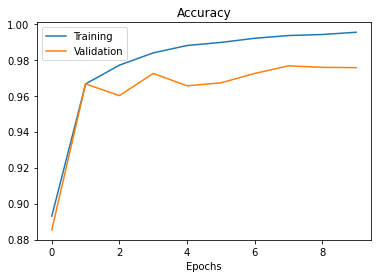

In [21]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs');

### Đánh giá

In [22]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

313/313 [==============================] - 2s 6ms/step - loss: 0.1139 - accuracy: 0.9788


0.9787999987602234

## Sử dụng Convolutional neural networks

In [23]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
# Số -1 là để cho python tự tính số còn lại cho phù hợp

In [24]:
X_train.shape

(60000, 28, 28, 1)

In [25]:
from tensorflow.keras.layers import Flatten, Activation, MaxPool2D, Conv2D

## Tạo model CNN

In [26]:
# Reset
K.clear_session()
# Tạo model
model = Sequential()
# Thêm các layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))
# Thiết lập thông số
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Training

In [27]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 29s 53ms/step - loss: 0.2476 - accuracy: 0.9231 - val_loss: 0.1036 - val_accuracy: 0.9669
Epoch 2/5
329/329 [==============================] - 17s 52ms/step - loss: 0.0634 - accuracy: 0.9801 - val_loss: 0.0680 - val_accuracy: 0.9809
Epoch 3/5
329/329 [==============================] - 18s 56ms/step - loss: 0.0423 - accuracy: 0.9874 - val_loss: 0.0466 - val_accuracy: 0.9854
Epoch 4/5
329/329 [==============================] - 18s 54ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0452 - val_accuracy: 0.9864
Epoch 5/5
329/329 [==============================] - 18s 54ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0545 - val_accuracy: 0.9857


### Đánh giá

In [29]:
model.evaluate(X_test, y_test_cat)[1]

313/313 [==============================] - 3s 9ms/step - loss: 0.0471 - accuracy: 0.9866


0.9865999817848206

### Bài tập tự luyện: 
So sánh DNN và CNN về chất lượng đầu ra, tiêu thụ tài nguyên, số epoch cần chạy, thời gian cần chạy.
Thay đổi các tham số như số layer, tăng giảm số Conv2D, số node trong mỗi layer, hàm activation... để xem sự thay đổi của kết quả. Lựa chọn tham số tối ưu.

### Bài tập (Khó nhẹ):
Thử sức với bộ dữ liệu Cifar. Đây là bộ dữ liệu gồm 10 đối tượng khác nhau cần nhận diện gồm:
- airplane 										
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck

Dữ liệu có sẵn trên Keras

**Bài tập**: Tạo model gồm các layer sau:

    - conv2d
    - conv2d
    - maxpool
    - conv2d
    - conv2d
    - maxpool
    - flatten
    - dense
    - output

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Bài tập (Khá khó): Thử sức với bộ dữ liệu Cat-Dog
Bộ dữ liệu gồm nhiều ảnh chó mèo, nhiệm vụ là phải nhận diện được đâu là ảnh mèo, đâu là chó, đã được để sẵn trong các thư mục cats, dogs tương ứng, đã chia sẵn ra các thư mục test và training.
Bộ dữ liệu này gồm nhiều ảnh, nên cần phải tiền xử lý ảnh sang tensor, học bài "Tiền xử lý (3) - Xử lý ảnh" trước khi làm bài tập này, đây là phần khó nhất của bài tập này.
Code gợi ý phần tiền xử lý dữ liệu:

`from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('../Data/Cat and Dog/training_set', 
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'binary')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../Data/Cat and Dog/test_set', 
                                            target_size = (64, 64), 
                                            batch_size = 32, 
                                            class_mode = 'binary') `                                                